In [34]:
import numpy as np
import pandas as pd
import os
import json
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud, STOPWORDS,ImageColorGenerator

I wanted to check what is my current working directory so I can properly import my dataset

In [2]:
os.getcwd()

'C:\\Users\\Marco\\Documents\\CIND 820'

I've loaded the dataset from a json file to convert to a pandas dataframe I've chosen to reduce the rows to 200,000 since the dataset was relatiively large already coming in at 6.17gb 

Since I wanted to predict review scores I've selected the reviews dataset primarily to work with review text data. 

In [3]:
reviews = []
with open('yelp_academic_dataset_review.json',encoding='utf-8') as fl:
    for i, line in enumerate(fl):
        reviews.append(json.loads(line))
        if i+1 >= 200000:
            break
df_rev = pd.DataFrame(reviews)
df_rev.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,xQY8N_XvtGbearJ5X4QryQ,OwjRMXRC0KyPrIlcjaXeFQ,-MhfebM0QIsKt87iDN-FNw,2.0,5,0,0,"As someone who has worked with many museums, I...",2015-04-15 05:21:16
1,UmFMZ8PyXZTY2QcwzsfQYA,nIJD_7ZXHq-FX8byPMOkMQ,lbrU8StCq3yDfr-QMnGrmQ,1.0,1,1,0,I am actually horrified this place is still in...,2013-12-07 03:16:52
2,LG2ZaYiOgpr2DK_90pYjNw,V34qejxNsCbcgD8C0HVk-Q,HQl28KMwrEKHqhFrrDqVNQ,5.0,1,0,0,I love Deagan's. I do. I really do. The atmosp...,2015-12-05 03:18:11
3,i6g_oA9Yf9Y31qt0wibXpw,ofKDkJKXSKZXu5xJNGiiBQ,5JxlZaqCnk1MnbgRirs40Q,1.0,0,0,0,"Dismal, lukewarm, defrosted-tasting ""TexMex"" g...",2011-05-27 05:30:52
4,6TdNDKywdbjoTkizeMce8A,UgMW8bLE0QMJDCkQ1Ax5Mg,IS4cv902ykd8wj1TR0N3-A,4.0,0,0,0,"Oh happy day, finally have a Canes near my cas...",2017-01-14 21:56:57


In [4]:
review=df_rev[['stars','text']]

review.head()

,stars,text
0,2.0,"As someone who has worked with many museums, I..."
1,1.0,I am actually horrified this place is still in...
2,5.0,I love Deagan's. I do. I really do. The atmosp...
3,1.0,"Dismal, lukewarm, defrosted-tasting ""TexMex"" g..."
4,4.0,"Oh happy day, finally have a Canes near my cas..."


In [5]:
review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   stars   200000 non-null  float64
 1   text    200000 non-null  object 
dtypes: float64(1), object(1)
memory usage: 3.1+ MB


In [9]:
print(review.describe())

               stars
count  200000.000000
mean        3.750115
std         1.435254
min         1.000000
25%         3.000000
50%         4.000000
75%         5.000000
max         5.000000


In [23]:
review.dtypes

stars    float64
text      object
dtype: object

Text(0.5, 0, 'Star Ratings ')

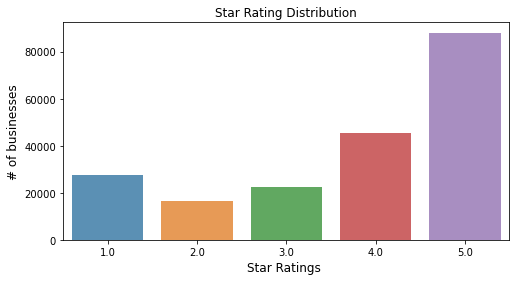

In [13]:
x=review['stars'].value_counts()
x=x.sort_index()
#plot
plt.figure(figsize=(8,4))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Star Rating Distribution")
plt.ylabel('# of businesses', fontsize=12)
plt.xlabel('Star Ratings ', fontsize=12)

I wanted to visualize the Seperate reviews so I decided to use wordcloud and per star review

In [119]:
stopwords = set(STOPWORDS)
def wordcloudFunc(data,title = None):
    wordclouds = WordCloud(
        background_color='white',
        stopwords=stopwords,
        #max_words=400,
        max_font_size=40,
        scale=3,
        random_state=0
    ).generate(str(data))
    
    fig = plt.figure(1,figsize=(20,20))
    plt.axis('off')
    if title:
        fig.subtitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)
        
    plt.imshow(wordclouds)
    plt.show()

In [120]:
onestarfilt=review['stars']==1.0
onestar=review[onestarfilt]
onestar.head()

,stars,text
1,1.0,I am actually horrified this place is still in...
3,1.0,"Dismal, lukewarm, defrosted-tasting ""TexMex"" g..."
15,1.0,"If I could give less than one star, that would..."
16,1.0,10pm on a super bowl Sunday and they're alread...
18,1.0,Tried to have my car repaired. Even made an a...


This is the onestar wordcloud function

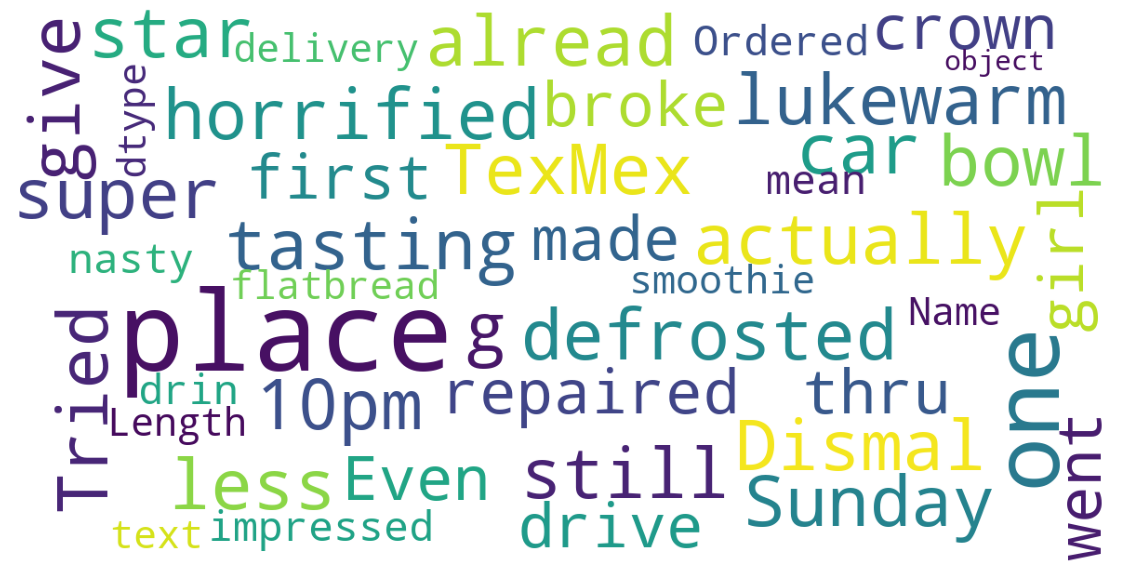

In [121]:
wordcloudFunc(onestar['text'].dropna())

In [122]:
twostarfilt=review['stars']==2.0
twostar=review[twostarfilt]
twostar.head()

,stars,text
0,2.0,"As someone who has worked with many museums, I..."
32,2.0,This actually used to be one of my favorite ho...
63,2.0,Decent food. Fishermen lobster or even congee ...
78,2.0,"Pros: Fun atmosphere, great for people watchin..."
86,2.0,"I love bookstores, and I love to spend some ti..."


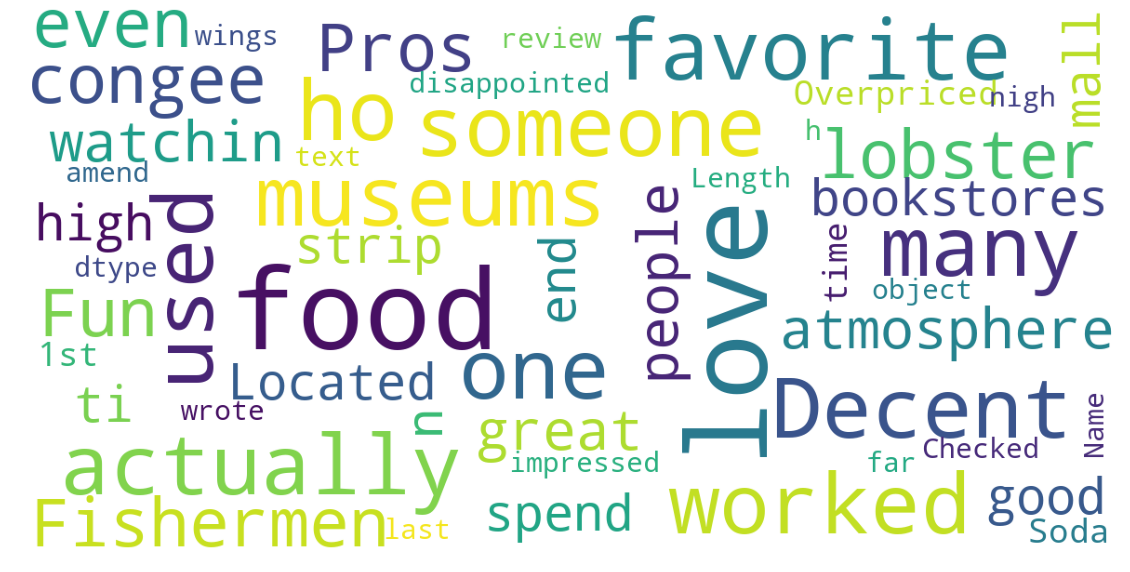

In [123]:
wordcloudFunc(twostar['text'].dropna())

In [124]:
threestarfilt=review['stars']==3.0
threestar=review[threestarfilt]
threestar.head()

,stars,text
19,3.0,My husband and I go there once a week since la...
34,3.0,The service is attentive. The decor attractive...
41,3.0,I stayed here back in April. Friday-Sunday. It...
42,3.0,Had brunch here Sunday with a friend. The meal...
44,3.0,Was super excited to bring my boyfriend to thi...


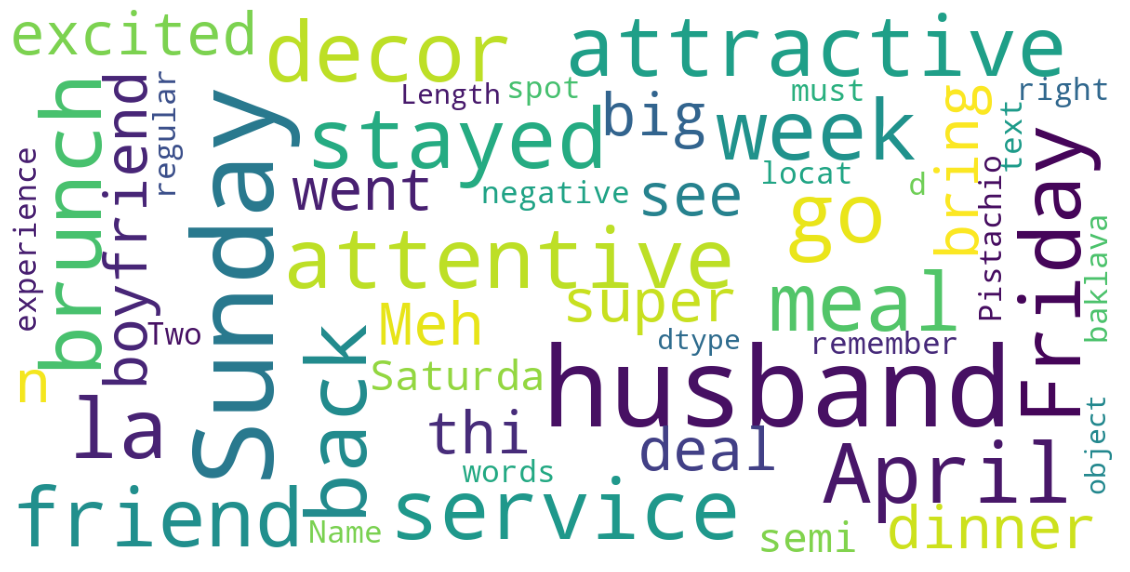

In [125]:
wordcloudFunc(threestar['text'].dropna())

In [126]:
fourstarfilt=review['stars']==4.0
fourstar=review[fourstarfilt]
fourstar.head()

,stars,text
4,4.0,"Oh happy day, finally have a Canes near my cas..."
9,4.0,I have been here twice. Very nice and laid bac...
11,4.0,ORDER In (Delivery) Review\n\nI discovered thi...
17,4.0,A close friend was in town and so instead of t...
22,4.0,"Coconut's Fish Cafe is a fantastic, Five Stars..."


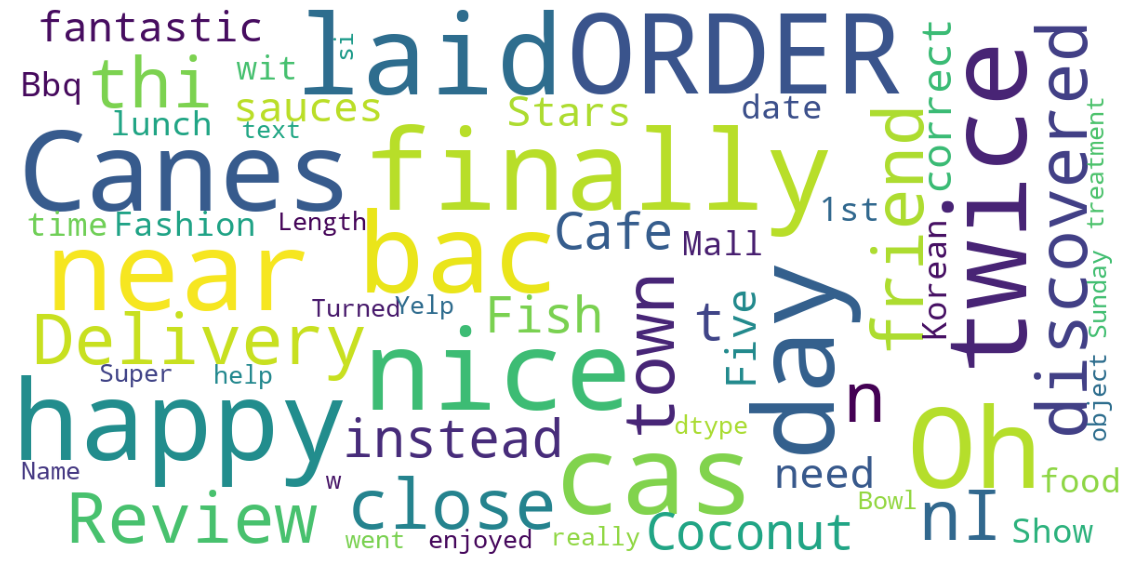

In [127]:
wordcloudFunc(fourstar['text'].dropna())

In [128]:
fivestarfilt=review['stars']==5.0
fivestar=review[fivestarfilt]
fivestar.head()

,stars,text
2,5.0,I love Deagan's. I do. I really do. The atmosp...
5,5.0,This is definitely my favorite fast food sub s...
6,5.0,"Really good place with simple decor, amazing f..."
7,5.0,"Awesome office and staff, very professional an..."
8,5.0,Most delicious authentic Italian I've had in t...


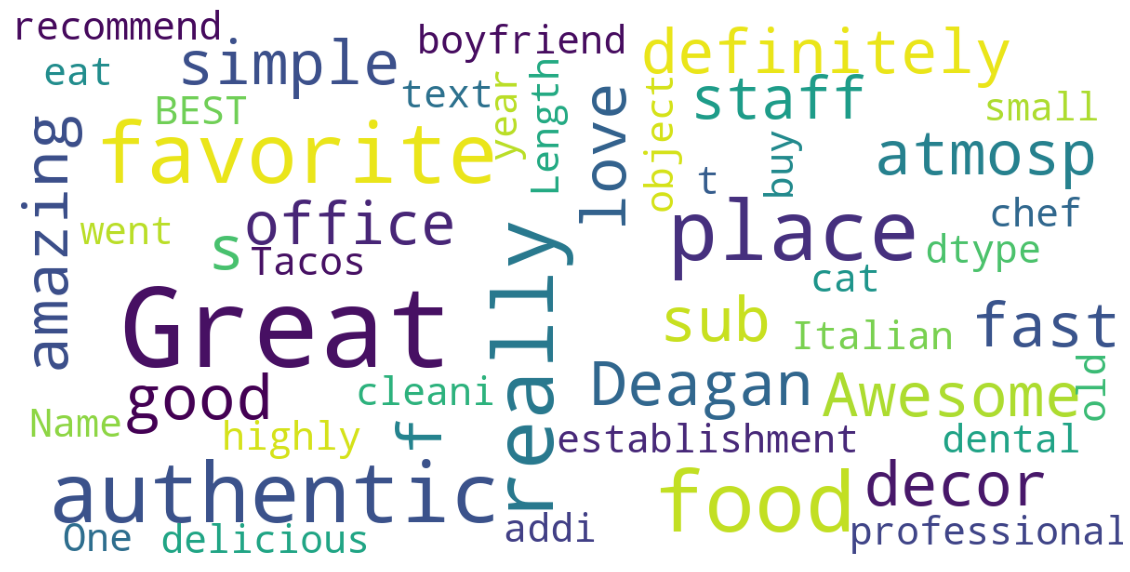

In [129]:
wordcloudFunc(fivestar['text'].dropna())

looking at all of the distribution below I can see that they are all relatively distributed the same way with the exception to firve star reviews having a few more shorter reviews than the rest

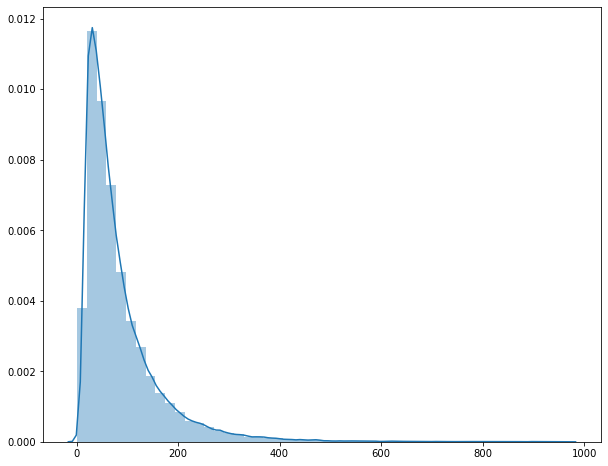

In [80]:
plt.figure(figsize=(10,8))
sns.distplot([len(txt.split()) for txt in fivestar['text'].values])
plt.show()

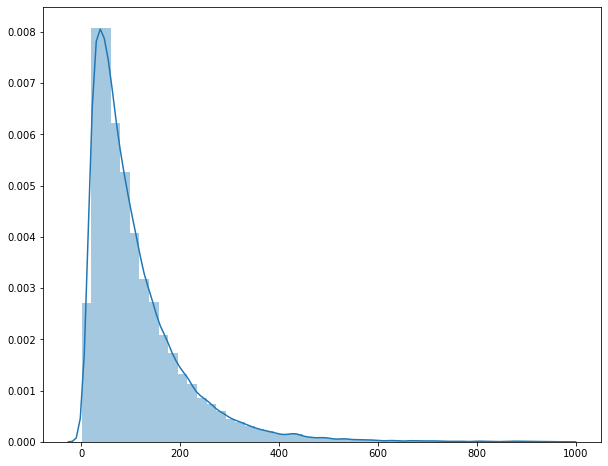

In [82]:
plt.figure(figsize=(10,8))
sns.distplot([len(txt.split()) for txt in fourstar['text'].values])
plt.show()

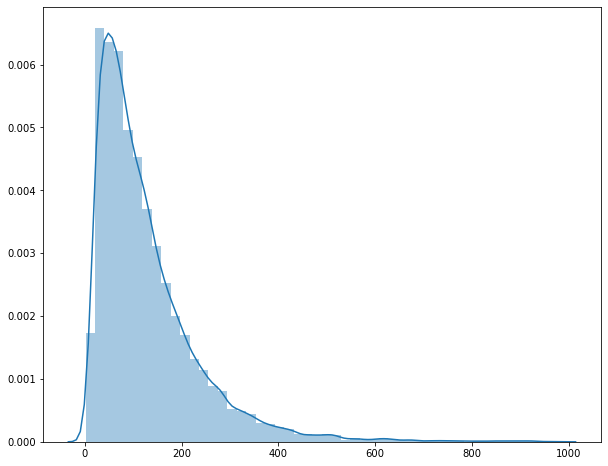

In [83]:
plt.figure(figsize=(10,8))
sns.distplot([len(txt.split()) for txt in threestar['text'].values])
plt.show()

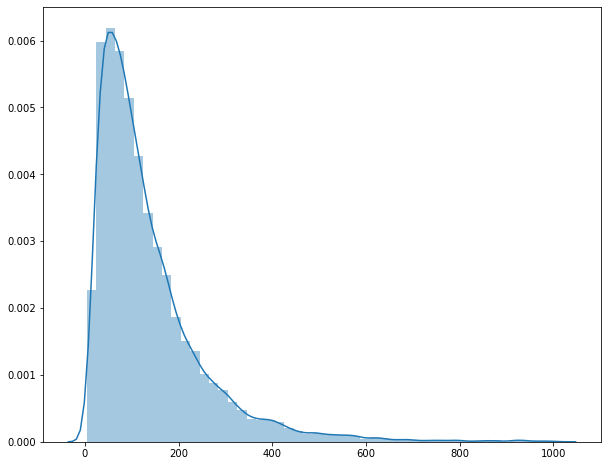

In [84]:
plt.figure(figsize=(10,8))
sns.distplot([len(txt.split()) for txt in twostar['text'].values])
plt.show()

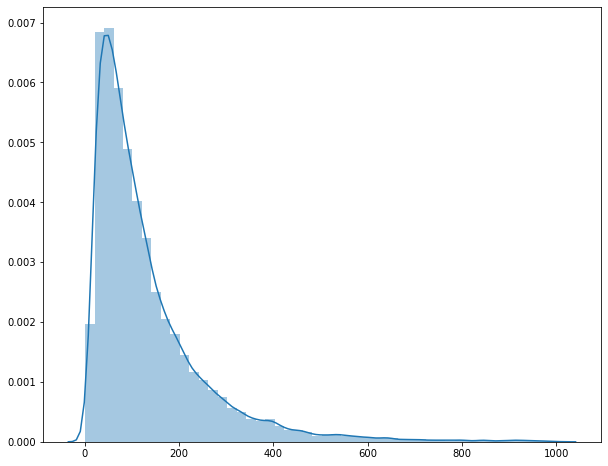

In [85]:
plt.figure(figsize=(10,8))
sns.distplot([len(txt.split()) for txt in onestar['text'].values])
plt.show()